In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Smart Device Usage Analysis for Bellabeat
**Case Study for Google Data Analytics Certificate Program**

Ekpenyong Effiong

# PHASE 1: Ask

**Key Objectives**

**1.Identify the business task** – Gain insight into how consumers are using their smart devices to better inform our marketing strategy.

**2.Consider key stakeholders** - Urška Sršen, Sando Mur & the Marketing Analytics Team

**3.A clear statement of the business task** – *How are our users using their smart devices?*


# PHASE 2 : Prepare

Key objectives:

1.Determine the credibility of the data:

The data is public data from FitBit Fitness Tracker Data. It's a dataset from thirty fitbit users that includes minute-level output for physical activity, heart rate, and sleep monitoring. It's a good database segmented in several tables with different aspects of the data of the device with lots of details about the user behaviour.

2.Sort and filter the data:

For this analysis I'm going to focus on the daily timeframe as my analysis is focused on detecting high-level trends in usage.




In [1]:
#Install & load packages
install.packages('tidyverse')
library('tidyverse')
library('lubridate')
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdif

In [3]:
#Importing the dataset we will be working with.
daily_activities <- read_csv("../input/bellabeat-case-study/dailyActivity_merged.csv")
sleep_day <- read_csv("../input/bellabeat-case-study/sleepDay_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)




In [4]:
#high level overview of the Daily Activity Dataset & the column names
head(daily_activities)
colnames(daily_activities)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [5]:
#high level overview of the Sleep Day Dataset
head(sleep_day)
colnames(sleep_day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

# PHASE 3 & 4: Process and Analyse

In [6]:
#some quick summary statistics for the daily activity dataframe:
daily_activities %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

In [7]:
#quick summary statistics for the sleep day dataframe:
sleep_day %>%  
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [29]:
#Prepare dataframes that would be used to analyze later. Adding an additional column that would be used to analyze the relationship between total active minutes & Calories
very_active <- daily_activities %>%
  mutate(TotalActiveTime = LightlyActiveMinutes+FairlyActiveMinutes+VeryActiveMinutes)
very_active

#Average Steps vs Average Calories Processing
daily_activities$ActivityDate <- as.POSIXct(daily_activities$ActivityDate, format = "%m/%d/%Y")
daily_activities$Day <- weekdays(daily_activities$ActivityDate)


activity <- daily_activities %>%
  group_by(Day)%>%
  summarize(avgSteps =mean(TotalSteps), avgCalories= mean(Calories))

activity$Day <- factor(activity$Day, levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))
activity <- activity[order(activity$Day), ]
activity

#Preparing the sleep data for analysis later
sleep_day_hr <- mutate(sleep_day, Total_hr_asleep=TotalMinutesAsleep/60, Total_hr_in_bed=TotalTimeInBed/60)
sleep_day_hr$SleepDay <- as.POSIXct(sleep_day_hr$SleepDay, format = "%m/%d/%Y")
sleep_day_hr$Day <- weekdays(sleep_day_hr$SleepDay)
sleeps <- sleep_day_hr %>%
  group_by(Day)%>%
  summarize(avgAsleep =mean(Total_hr_asleep), avgInBed= mean(Total_hr_in_bed))
sleeps$Day <- factor(sleeps$Day, levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))
sleeps <- sleeps[order(sleeps$Day), ]
sleeps



Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveTime
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,291
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,345
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,245


Day,avgSteps,avgCalories
<fct>,<dbl>,<dbl>
Monday,7780.867,2324.208
Tuesday,8125.007,2356.013
Wednesday,7559.373,2302.620
Thursday,7405.837,2199.571
Friday,7448.230,2331.786
Saturday,8152.976,2354.968
Sunday,6933.231,2263.000


Day,avgAsleep,avgInBed
<fct>,<dbl>,<dbl>
Monday,6.980496,7.602837
Tuesday,6.742308,7.388205
Wednesday,7.244697,7.833838
Thursday,6.706154,7.263333
Friday,6.757018,7.417544
Saturday,7.013506,7.687931
Sunday,7.545758,8.391818


# PHASE 5: SHARE

We'll be looking at some visuals that provide insight as to how consumers are using their smart devices

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



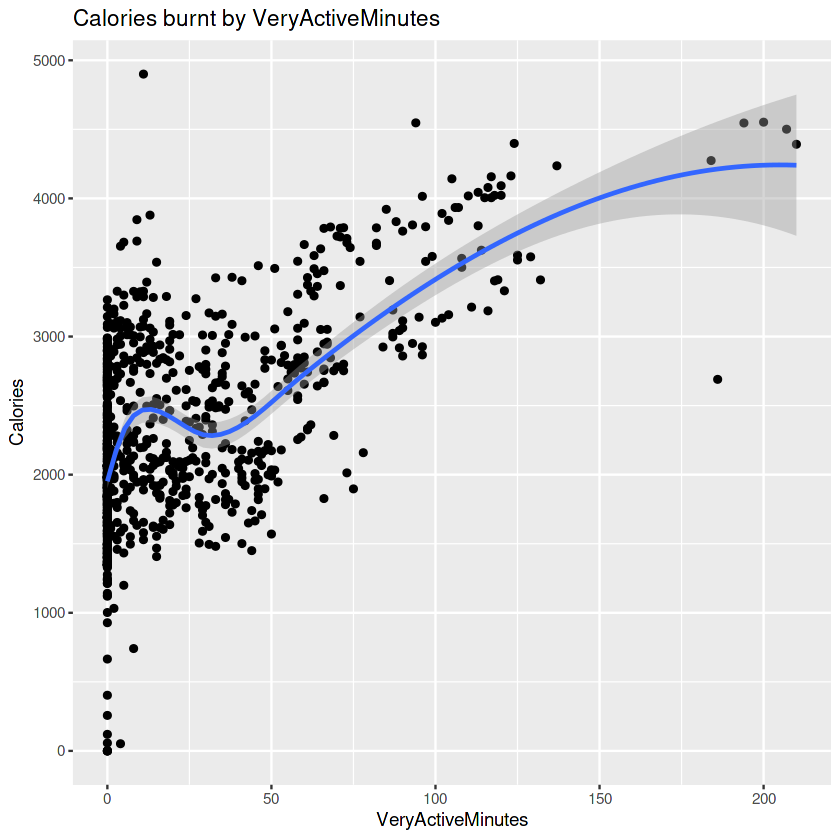

In [14]:
#Assess if there is a relationship between VeryActiveMinutes & Calories burned
ggplot(data=daily_activities) + geom_point(mapping = aes(x=VeryActiveMinutes, y=Calories)) + 
  geom_smooth(mapping = aes(x=VeryActiveMinutes, y=Calories)) + labs(title = "Calories burnt by VeryActiveMinutes")


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



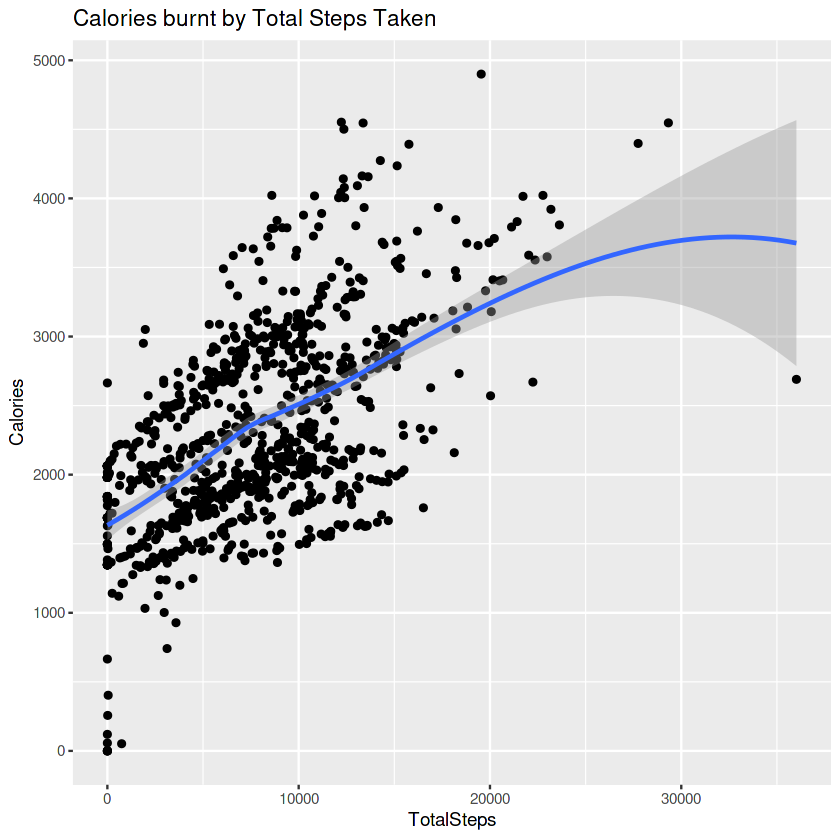

In [28]:
#Realtionship between Total Steps Taken & Calories
ggplot(data = daily_activities) + geom_point(mapping = aes(x=TotalSteps, y=Calories)) + 
  geom_smooth(mapping = aes(x=TotalSteps, y=Calories)) + labs(title ="Calories burnt by Total Steps Taken")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



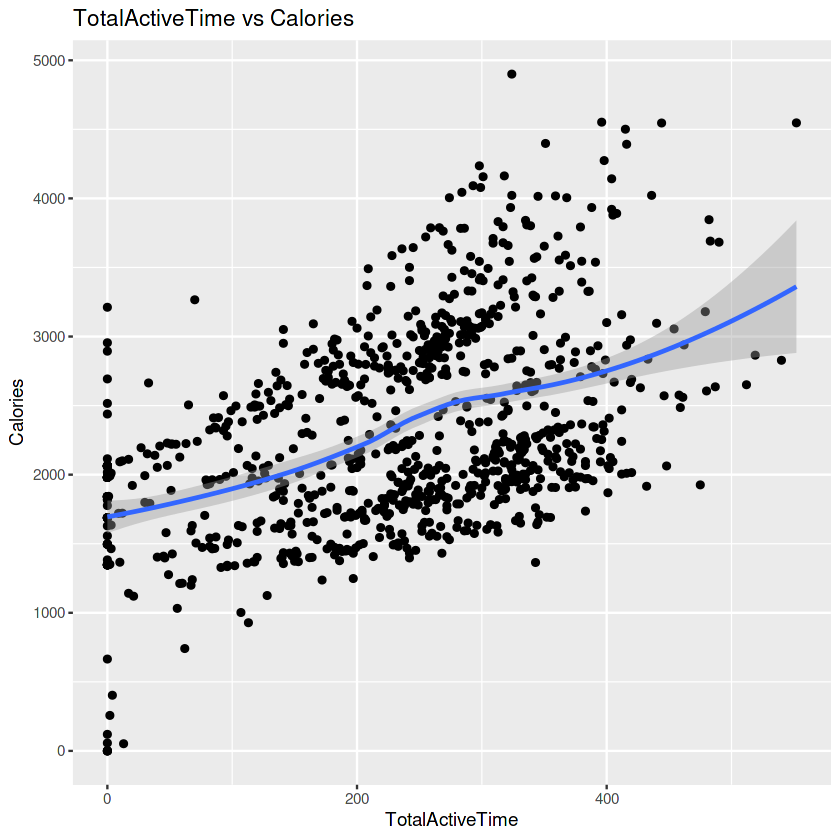

In [15]:
#Relationship between Total Active Minutes (Sum of Fairly, Lightly & Very Active Minutes) & Calories Burned to confirm if more calories are burnt if active or not
ggplot(data=very_active) + geom_point(mapping = aes(x=TotalActiveTime, y=Calories)) +
  geom_smooth(mapping = aes(x=TotalActiveTime, y=Calories)) + labs(title = "TotalActiveTime vs Calories")

From the viz, it shows that if a user is able put in some activity, they are bound to burn more calories.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



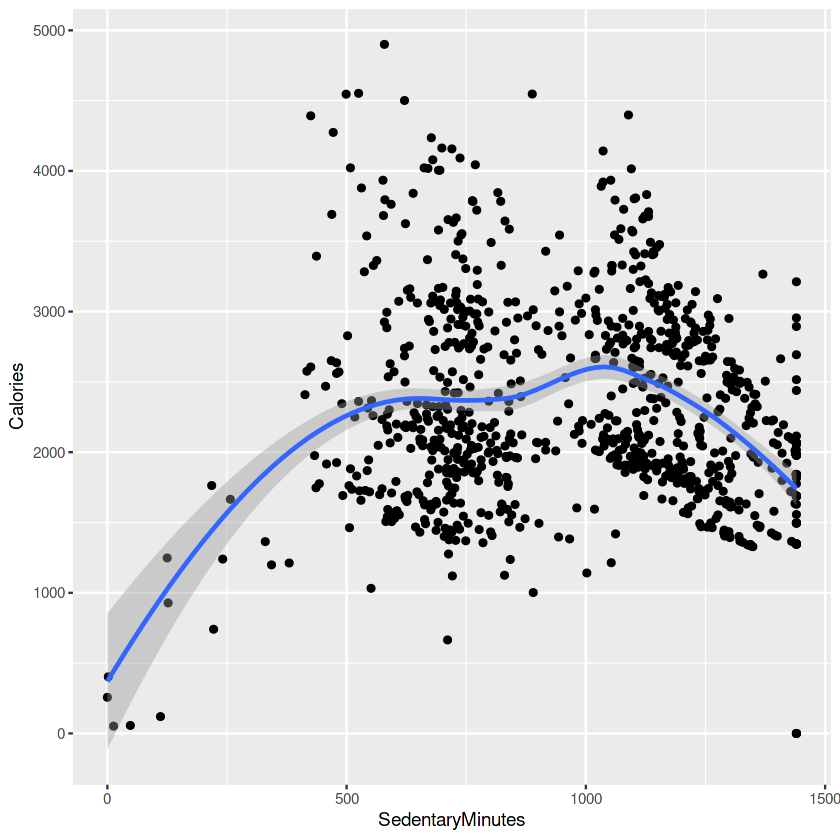

In [16]:
#Assess relationship between SedentaryMinutes & Calories Burned
ggplot(data=very_active) + geom_point(mapping = aes(x=SedentaryMinutes, y=Calories)) +
  geom_smooth(mapping = aes(x=SedentaryMinutes, y=Calories))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



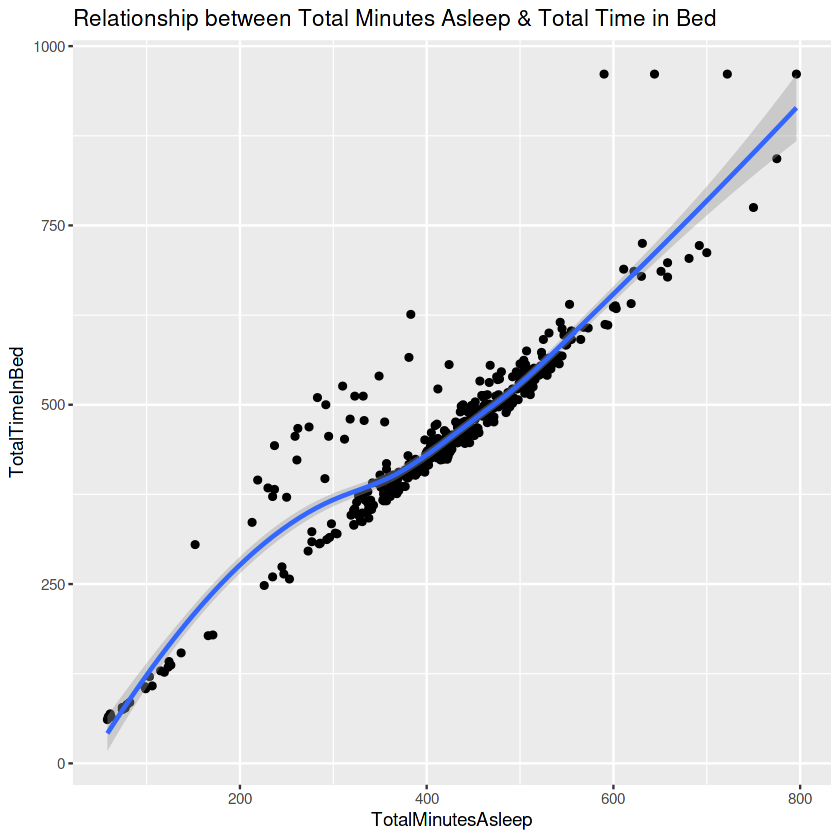

In [20]:
#Sleep Relationship
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point() +
geom_smooth(mapping = aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + labs (title = "Relationship between Total Minutes Asleep & Total Time in Bed")

There's a strong relationship between the time spent sleeping and the total time a user spends in his/her bed

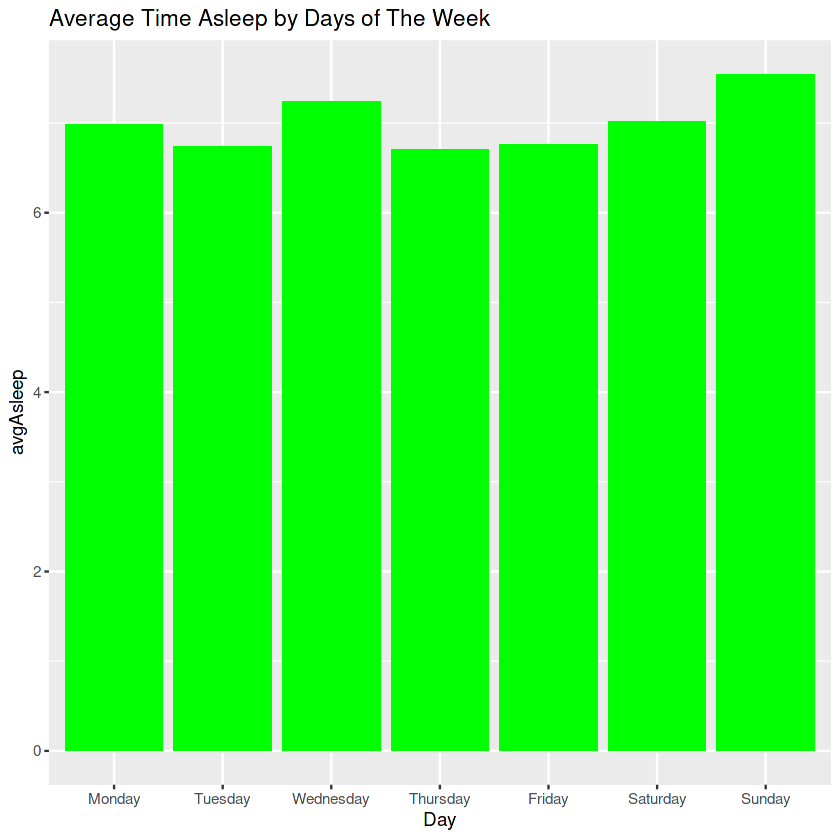

In [25]:
#Average Time Spent Asleep by Days of The Week
ggplot(data = sleeps, aes(x= Day, y=avgAsleep)) + geom_bar(stat = "identity", fill="green") + labs(title = "Average Time Asleep by Days of The Week")


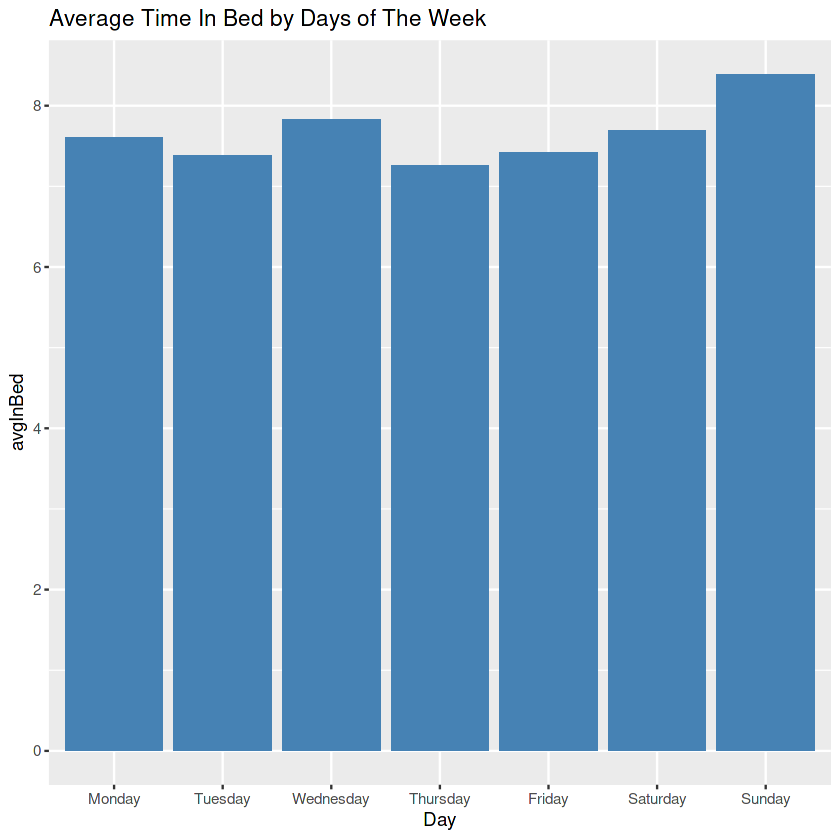

In [27]:
#Average Time Spent in Bed by The Days of The Week
ggplot(data = sleeps, aes(x= Day, y=avgInBed)) + geom_bar(stat = "identity", fill="steelblue") + labs(title = "Average Time In Bed by Days of The Week")


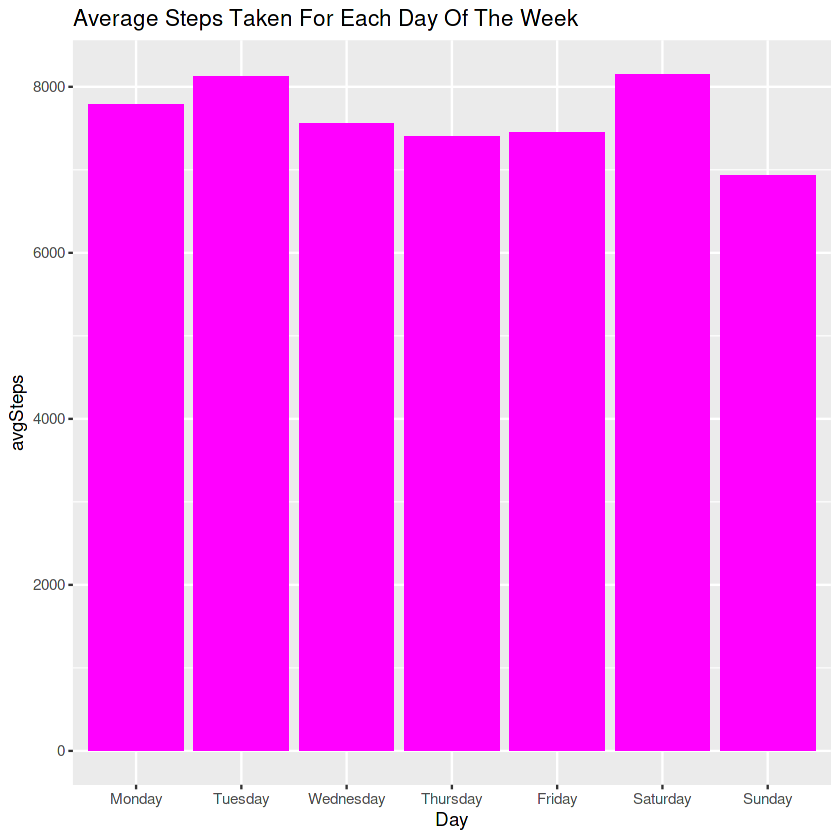

In [30]:
#Average Steps taken by Days of The Week
ggplot(data = activity, aes(x = Day, y=avgSteps)) + geom_bar(stat = "identity", fill="magenta") + labs(title = "Average Steps Taken For Each Day Of The Week")

# PHASE 6: ACT

Based on the data provided and the analysis done, the following high level insights were drawn;

* Users tend to take more steps on Saturday than any other day of the week.
* Users spend more time in bed and sleep in more on Sundays than any other day of the week
* The more activity users engage in, the more calories they burn.
* According to this [article](https://www.verywellfit.com/whats-typical-for-average-daily-steps-3435736), the average steps to be taken should be 10,000 steps a day but the user provided data recorded an average of 8,000 steps.
* This [article](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need) recommends that adults should get a minimum of 7 hours of sleep but based on the data provided users barely hit the 7 hour mark though on Sundays, they tend to sleep for more than 7 hours.

**RECOMMENDATIONS**
The marketing team strategy should focus on advising new customers on how the smart wearables can help them achieve & maintain a healthy lifestyle whilst we can improve on the Bellabeat application sending out notifications to users to help them meet their daily steps, daily activity & daily sleep goals.